# 커스텀 데이터셋(Custom Dataset)

그런데 torch.utils.data.Dataset을 상속받아 직접 커스텀 데이터셋(Custom Dataset)을 만드는 경우도 있습니다. torch.utils.data.Dataset은 파이토치에서 데이터셋을 제공하는 추상 클래스입니다. Dataset을 상속받아 다음 메소드들을 오버라이드 하여 커스텀 데이터셋을 만들어보겠습니다.

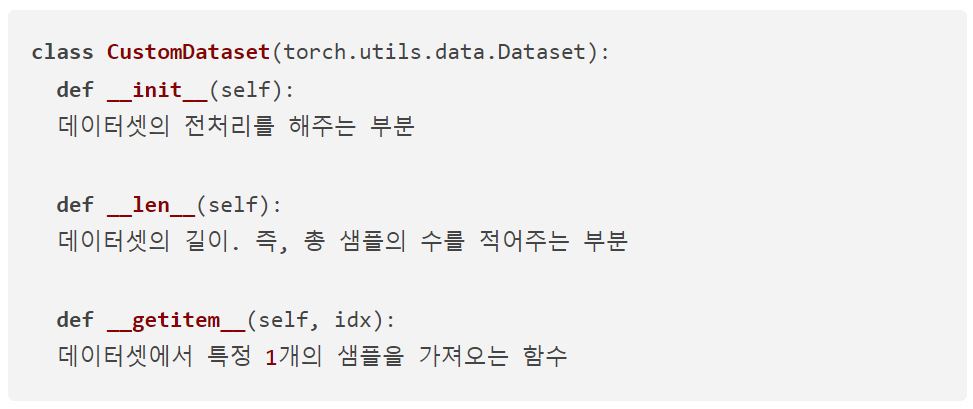

# 커스텀 데이터셋(Custom Dataset)으로 선형 회귀 구현하기

In [1]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Dataset 상속
class CustomDataset(Dataset): 
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]
 
  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = torch.nn.Linear(3,1)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 35021.218750
Epoch    0/20 Batch 2/3 Cost: 8503.314453
Epoch    0/20 Batch 3/3 Cost: 4019.861084
Epoch    1/20 Batch 1/3 Cost: 1062.098511
Epoch    1/20 Batch 2/3 Cost: 224.104813
Epoch    1/20 Batch 3/3 Cost: 42.000233
Epoch    2/20 Batch 1/3 Cost: 39.760796
Epoch    2/20 Batch 2/3 Cost: 7.846144
Epoch    2/20 Batch 3/3 Cost: 1.700975
Epoch    3/20 Batch 1/3 Cost: 5.553403
Epoch    3/20 Batch 2/3 Cost: 0.070366
Epoch    3/20 Batch 3/3 Cost: 0.556405
Epoch    4/20 Batch 1/3 Cost: 0.153578
Epoch    4/20 Batch 2/3 Cost: 3.479017
Epoch    4/20 Batch 3/3 Cost: 1.412767
Epoch    5/20 Batch 1/3 Cost: 0.209490
Epoch    5/20 Batch 2/3 Cost: 3.524392
Epoch    5/20 Batch 3/3 Cost: 0.457733
Epoch    6/20 Batch 1/3 Cost: 2.696068
Epoch    6/20 Batch 2/3 Cost: 0.774144
Epoch    6/20 Batch 3/3 Cost: 0.027399
Epoch    7/20 Batch 1/3 Cost: 0.423291
Epoch    7/20 Batch 2/3 Cost: 2.915498
Epoch    7/20 Batch 3/3 Cost: 0.003657
Epoch    8/20 Batch 1/3 Cost: 0.632043
Epoch   

In [2]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[150.4147]], grad_fn=<AddmmBackward0>)
